# Which genes are turned on/off in some cancers but not others?

In [1]:
import NotebookImport
from DX_screen import *

importing IPython notebook from DX_screen

importing IPython notebook from Imports

importing IPython notebook from Setup/DX_Imports

importing IPython notebook from Setup/Imports

Populating the interactive namespace from numpy and matplotlib


In [5]:
def dx_group(split, matched_tn, fc=1.):
    '''
    Function to screen for differentially expressed features within
    the context of a binary splitting variable.
    '''
    tab_1 = binomial_test_screen(matched_tn.ix[:, ti(split==True)], fc=fc)
    tab_1 = tab_1.ix[(((tab_1.frac - .5).abs() > .25) & (tab_1.p > .001)) == False]
    
    tab_0 = binomial_test_screen(matched_tn.ix[:, ti(split==False)], fc=fc)
    tab_0 = tab_0.ix[(((tab_0.frac - .5).abs() > .25) & (tab_0.p > .001)) == False]

    t = pd.concat([tab_0, tab_1], keys=['miss','hit'], axis=1)
    return t

In [4]:
vc = codes.ix[matched_rna.columns.get_level_values(0).unique()].value_counts()
vc.sum()

650

In [6]:
cancers = ti(vc > 40)

Run the screen, splitting on each cancer.  

In [1]:
dx = {c: dx_group(codes==c, matched_tn) for c in cancers}
dx = pd.concat(dx, axis=1)
dx = dx.ix[dx_rna.index]

NameError: name 'cancers' is not defined

In [10]:
t_m = dx.xs(('miss','frac'), axis=1, level=[1,2])
t_h = dx.xs(('hit','frac'), axis=1, level=[1,2])
num_dx = dx.xs(('hit','num_dx'), axis=1, level=[1,2])
t_m = t_m.mask(num_dx < 30)

In [14]:
t_h.head()

,BRCA,COAD,HNSC,KIRC,LIHC,LUAD,LUSC,PRAD,THCA
?,0.37,0.78,0.22,0.40,0.74,0.61,0.52,0.38,0.37
A1BG,0.77,0.17,0.54,0.56,0.12,0.56,0.42,0.12,0.81
A1CF,0.39,0.05,0.44,0.56,0.22,0.67,0.62,0.57,0.50
A2BP1,0.29,0.12,0.25,0.06,0.58,0.55,0.59,0.13,0.53
A2LD1,0.47,0.59,0.39,0.18,0.36,0.79,0.66,0.81,0.66


####Exploration of F<sub>c</sub>  
* We define F<sub>c</sub> as the fraction of things overexpressed in a specific cancer  
* Due to the way we calculate the statistic, we exprect the cancers with larger sample sizes to have more moderate values as its less likely to get larger fractions by chance  
* The skew of this distribution is also very likely dependent on the heterogenety of the patient population for each cohort and also potentially on tumor purity

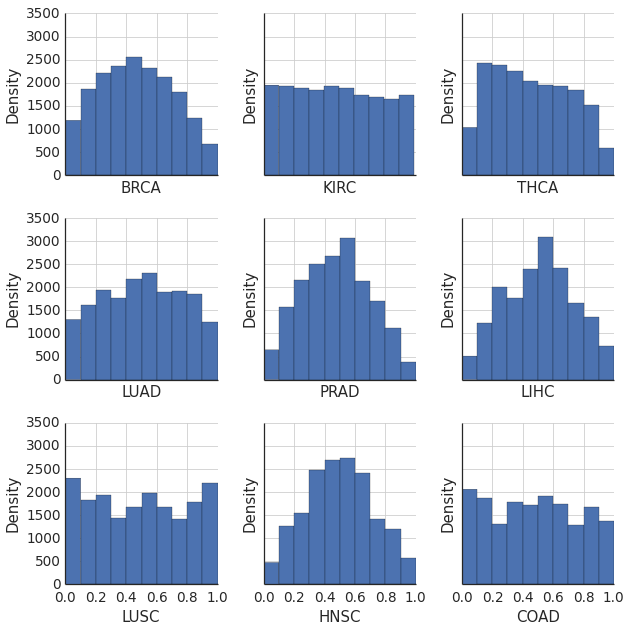

In [22]:
#Do not import
fig, axs = subplots(3,3, figsize=(9,9), sharex=True, sharey=True)
axs = axs.flatten()
for i,c in enumerate(cancers):
    ax = axs[i]
    s1, s2 = match_series(t_h[c].dropna(), t_m[c].dropna())
    s1.hist(bins=10, ax=ax)
    ax.set_xlabel(c)
    ax.set_ylabel('Density');
sns.despine(fig)
fig.tight_layout()

Plotting cancer fraction verses rest of subjects.  Distribution of rest is slighly different for each plot as it holds out patients from the specific cohort being plotted.

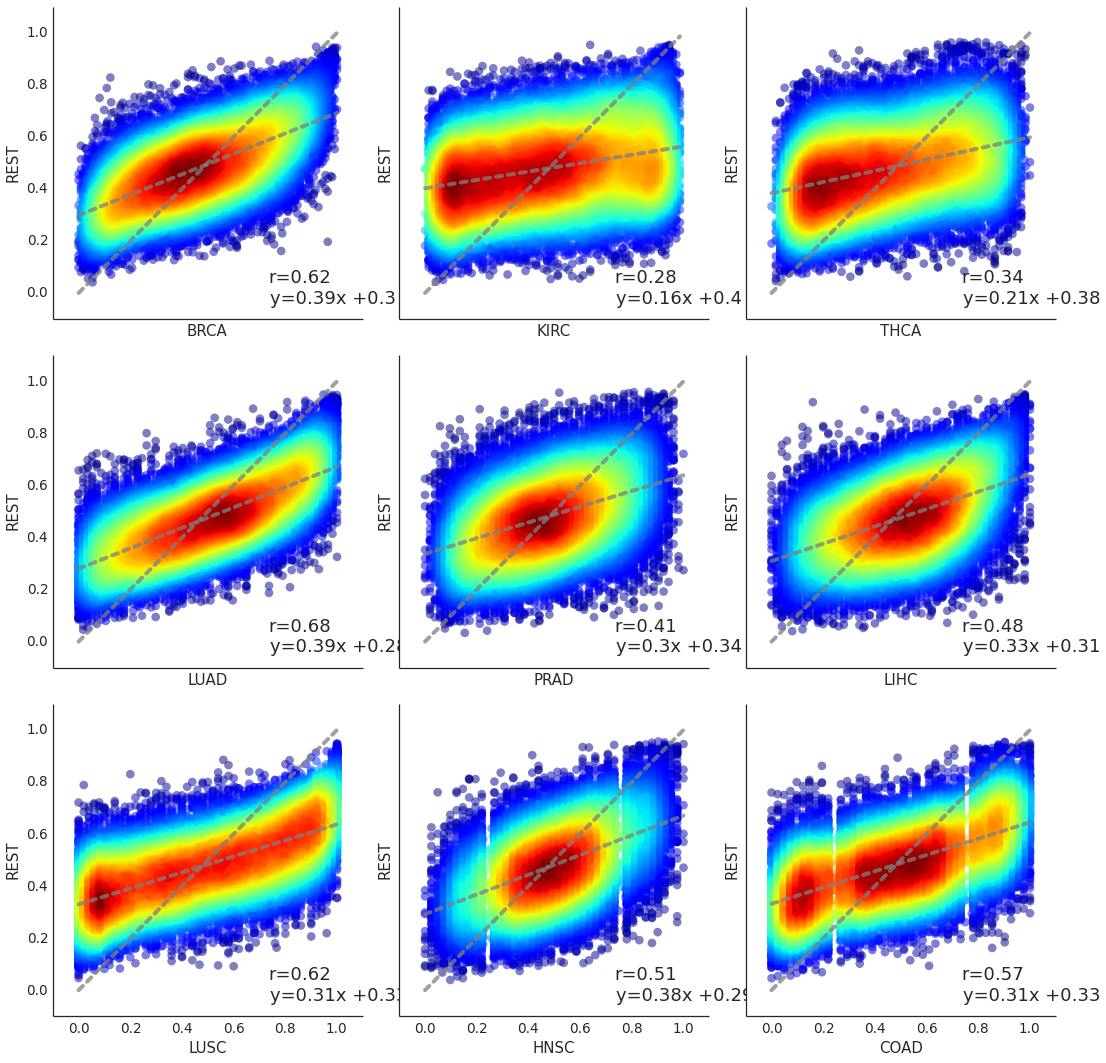

In [16]:
#Do not import
fig, axs = subplots(3,3, figsize=(15,15), sharex=True, sharey=True)
axs = axs.flatten()
for i,c in enumerate(cancers):
    ax = axs[i]
    s1, s2 = match_series(t_h[c].dropna(), t_m[c].dropna())
    fig, ax = init_ax(ax, figsize=(5, 5))
    plot_regression(s1, s2, density=True, rad=.1, ax=ax)

    ax.set_xlabel(c)
    ax.set_ylabel('REST');
sns.despine(fig)
fig.tight_layout()

Regression coefficients for above plots.

In [24]:
count = vc.head(9)
count.name = 'count'

reg = pd.DataFrame({c: linear_regression(t_h[c].dropna(), t_m[c]) for c in t_m}).T
reg = reg.join(count)
reg

,intercept,p-value,r-value,slope,stderr,count
BRCA,0.30,0,0.62,0.39,0,111
COAD,0.33,0,0.57,0.31,0,41
HNSC,0.29,0,0.51,0.38,0,41
KIRC,0.40,0,0.28,0.16,0,72
LIHC,0.31,0,0.48,0.33,0,50
LUAD,0.28,0,0.68,0.39,0,57
LUSC,0.33,0,0.62,0.31,0,50
PRAD,0.34,0,0.41,0.30,0,52
THCA,0.38,0,0.34,0.21,0,59
